In [1]:
import os
import collections
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path

import sys
sys.path.append("../src")
#importlib.reload(conversion_mat_to_py)
from conversion_mat_to_py import mat2dict, pretty_dict, matobj2dict, dict2ntuple


In [2]:
caminho = '/Users/User/OneDrive/TCC/MoVi/IMUmatlab_Subject/'
imu_filename = caminho + 'imu_Subject_1.mat'

In [3]:
# Reading MoVi files as a Python dictionary
sample = mat2dict(imu_filename)
sample.keys()

dict_keys(['S1_Synched', 'S2_Synched', 'I1', 'I2', 'S1', 'S2'])

In [4]:
pretty_dict(sample, print_type=False, indent=1)

	Key: S1_Synched
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
		Key: delay
		Key: scale
	Key: S2_Synched
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
		Key: delay
		Key: scale
	Key: I1
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: I2
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: S1
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescription
		Key: dataHeader
		Key: data
	Key: S2
		Key: originalFile
		Key: description
		Key: jointNumbers
		Key: jointNames
		Key: dataTypes
		Key: dataTypesDescript

In [5]:
# Nome das juntas onde estão os sensores
jointNames = sample['S2_Synched']['jointNames']

# Número das juntas onde estão os sensores
jointNumbers = sample['S2_Synched']['jointNumbers']

# Dados
Data = sample['S1_Synched']['data']

In [6]:
print(jointNames)
print(jointNumbers)

['Hip' 'RightUpLeg' 'RightLeg' 'RightFoot' 'LeftUpLeg' 'LeftLeg'
 'LeftFoot' 'RightShoulder' 'RightArm' 'RightForeArm' 'RightHand'
 'LeftShoulder' 'LeftArm' 'LeftForeArm' 'LeftHand' 'Head' 'Neck' 'Spine3'
 'Spine2' 'Spine1' 'Spine']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21']


In [8]:
# Tipos de dados para cada sensor
print(sample['S2_Synched']['dataTypes'])
print(sample['S2_Synched']['dataTypesDescription'])


['X' 'V' 'Q' 'A' 'W']
['Displacement (meter)' 'Speed (meter per second)'
 'Posture data (Quaternions)' 'Acceleration (g)'
 'Angular velocity (radian per second)']


In [7]:
dataHeader_filename = caminho + 'dataHeader.mat'
dataHeader = sio.loadmat(dataHeader_filename)
pretty_dict(dataHeader, print_type=False, indent=1)

	Key: __header__
	Key: __version__
	Key: __globals__
	Key: None
	Key: __function_workspace__


In [10]:
dataHeader['None']

MatlabOpaque([(b'x', b'MCOS', b'string', array([[3707764736],
       [         2],
       [         1],
       [         1],
       [         1],
       [         1]], dtype=uint32))],
             dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])

In [8]:
header = pd.read_csv(caminho + 'columns.csv', sep=';')
header = header[:].values.tolist()

In [9]:
data = pd.DataFrame(Data, columns=header)
data.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,...,21-Q-s,21-Q-x,21-Q-y,21-Q-z,21-A-x,21-A-y,21-A-z,21-W-x,21-W-y,21-W-z
0,0.523799,0.477254,-0.0158,-0.003592,-0.015807,0.006434,-0.155127,0.700358,0.167102,0.676392,...,1.0,0.0,0.0,0.0,-0.986627,0.020564,0.229234,-0.052400,-0.0175,-0.001541
1,0.523803,0.477126,-0.0158,-0.002723,-0.017600,0.006137,-0.155380,0.700258,0.167130,0.676441,...,1.0,0.0,0.0,0.0,-0.984015,0.025610,0.224376,-0.052400,-0.0175,0.007207
2,0.523788,0.476911,-0.0158,-0.001607,-0.019954,0.006012,-0.155661,0.700156,0.167255,0.676511,...,1.0,0.0,0.0,0.0,-0.984496,0.026994,0.223589,-0.052399,-0.0175,0.019358
3,0.523853,0.476709,-0.0158,-0.000560,-0.019604,0.005892,-0.156049,0.700056,0.167303,0.676497,...,1.0,0.0,0.0,0.0,-0.984398,0.030201,0.229154,-0.052402,-0.0175,0.017005
4,0.523865,0.476518,-0.0158,-0.002194,-0.021704,0.005847,-0.156324,0.699955,0.167326,0.676501,...,1.0,0.0,0.0,0.0,-0.984311,0.038152,0.229035,-0.052392,-0.0175,0.017632


In [10]:
data_01 = data.iloc[500:1200,:16]
data_01.head()

,01-X-x,01-X-y,01-X-z,01-V-x,01-V-y,01-V-z,01-Q-s,01-Q-x,01-Q-y,01-Q-z,01-A-x,01-A-y,01-A-z,01-W-x,01-W-y,01-W-z
500,0.432207,0.552823,-0.015447,-0.310442,0.631798,0.046370,-0.399707,0.571860,0.454190,0.554052,-1.147978,0.242974,0.360598,-0.923299,0.584652,-0.391735
501,0.432365,0.556754,-0.016594,-0.280485,0.653851,0.043151,-0.398778,0.570841,0.459196,0.551655,-1.146427,0.244702,0.415089,-1.103406,0.817493,-0.574192
502,0.433372,0.561322,-0.017329,-0.233778,0.675727,0.043647,-0.397275,0.569981,0.465152,0.548685,-1.083179,0.184010,0.350544,-1.194740,1.036464,-0.653413
503,0.434402,0.567179,-0.017740,-0.184770,0.688519,0.045346,-0.395496,0.569217,0.471468,0.545222,-1.067808,0.112188,0.213959,-1.236689,1.097899,-0.637406
504,0.434890,0.572493,-0.018264,-0.141251,0.663390,0.041306,-0.393948,0.568509,0.477656,0.541688,-1.075784,0.013965,0.110796,-1.264990,1.027795,-0.539722


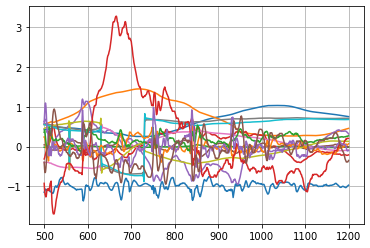

In [11]:
plt.plot(data_01.index, data_01.values)
plt.grid()
plt.show()

In [12]:
data_01_X = data.iloc[500:1200,:3]
data_01_X.head()

,01-X-x,01-X-y,01-X-z
500,0.432207,0.552823,-0.015447
501,0.432365,0.556754,-0.016594
502,0.433372,0.561322,-0.017329
503,0.434402,0.567179,-0.017740
504,0.434890,0.572493,-0.018264


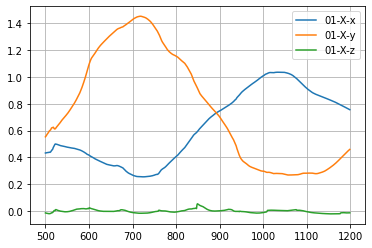

In [13]:
plt.plot(data_01_X.index, data_01_X.values)
plt.grid()
plt.legend(('01-X-x',
  '01-X-y',
  '01-X-z'))
plt.show()

In [14]:
data_01_V = data.iloc[500:1200,3:6]
data_01_V.head()

,01-V-x,01-V-y,01-V-z
500,-0.310442,0.631798,0.046370
501,-0.280485,0.653851,0.043151
502,-0.233778,0.675727,0.043647
503,-0.184770,0.688519,0.045346
504,-0.141251,0.663390,0.041306


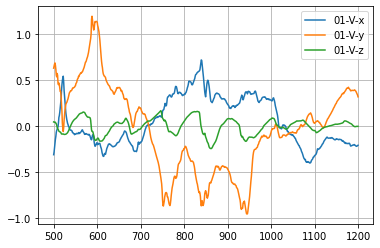

In [15]:
plt.plot(data_01_V.index, data_01_V.values)
plt.grid()
plt.legend(('01-V-x',
  '01-V-y',
  '01-V-z'))
plt.show()

In [16]:
data_01_Q = data.iloc[500:1200,6:10]
data_01_Q.head()

,01-Q-s,01-Q-x,01-Q-y,01-Q-z
500,-0.399707,0.571860,0.454190,0.554052
501,-0.398778,0.570841,0.459196,0.551655
502,-0.397275,0.569981,0.465152,0.548685
503,-0.395496,0.569217,0.471468,0.545222
504,-0.393948,0.568509,0.477656,0.541688


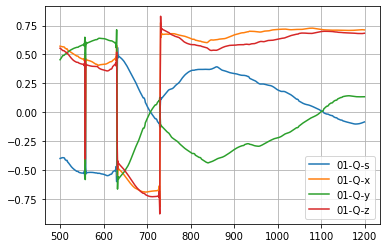

In [17]:
plt.plot(data_01_Q.index, data_01_Q.values)
plt.grid()
plt.legend(('01-Q-s',
  '01-Q-x',
  '01-Q-y',
  '01-Q-z'))
plt.show()

In [18]:
data_01_A = data.iloc[500:1200,10:13]
data_01_A.head()

,01-A-x,01-A-y,01-A-z
500,-1.147978,0.242974,0.360598
501,-1.146427,0.244702,0.415089
502,-1.083179,0.184010,0.350544
503,-1.067808,0.112188,0.213959
504,-1.075784,0.013965,0.110796


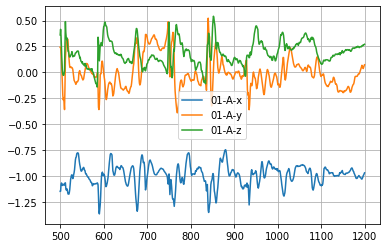

In [19]:
plt.plot(data_01_A.index, data_01_A.values)
plt.grid()
plt.legend(('01-A-x',
  '01-A-y',
  '01-A-z'))
plt.show()

In [20]:
data_01_W = data.iloc[500:1200,13:16]
data_01_W.head()

,01-W-x,01-W-y,01-W-z
500,-0.923299,0.584652,-0.391735
501,-1.103406,0.817493,-0.574192
502,-1.194740,1.036464,-0.653413
503,-1.236689,1.097899,-0.637406
504,-1.264990,1.027795,-0.539722


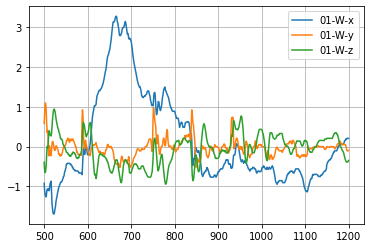

In [21]:
plt.plot(data_01_W.index, data_01_W.values)
plt.grid()
plt.legend(('01-W-x',
  '01-W-y',
  '01-W-z'))
plt.show()

## Abrindo todos os dados 'S1_Synched', 'S2_Synched', 'I1', 'I2', 'S1', 'S2'

In [22]:
S1_Synched = sample['S1_Synched']['data']
S2_Synched = sample['S2_Synched']['data']
S1 = sample['S1']['data']
S2 = sample['S2']['data']
I1 = sample['I1']['data']
I2 = sample['I2']['data']

In [23]:
S1_Synched = S1_Synched[:,6:10]
S2_Synched = S2_Synched[:,6:10]
S1 = S1[:,6:10]
S2 = S2[:,6:10]
I1 = I1[:,6:10]
I2 = I2[:,6:10]

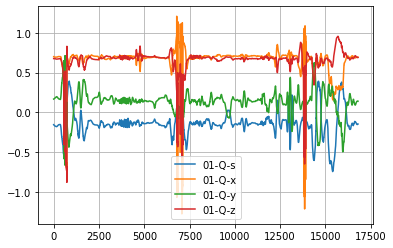

In [24]:
plt.plot(S1_Synched)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

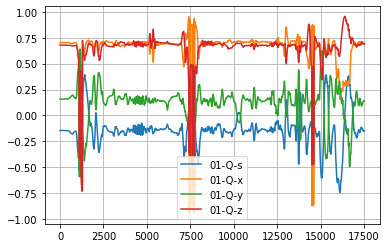

In [25]:
plt.plot(S1)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

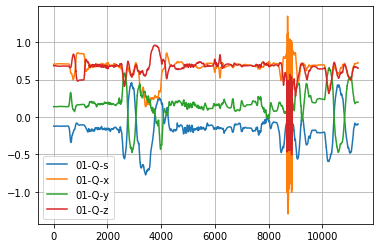

In [26]:
plt.plot(S2_Synched)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

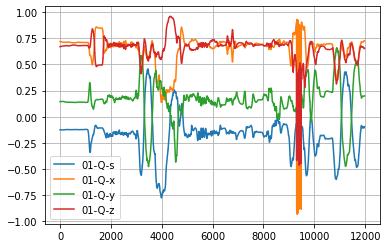

In [27]:
plt.plot(S2)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

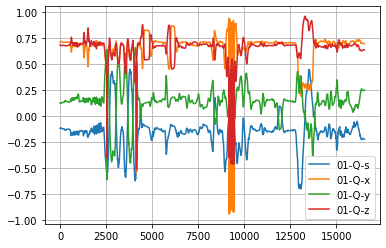

In [28]:
plt.plot(I1)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()

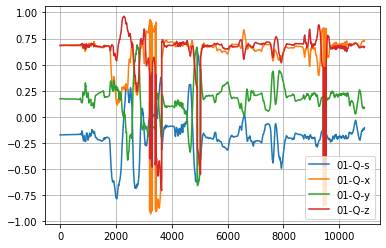

In [29]:
plt.plot(I2)
plt.grid()
plt.legend(('01-Q-s', '01-Q-x', '01-Q-y', '01-Q-z'))
plt.show()